# Performing Sentiment Analysis on Subreddit Comments & Visualizing it.


(hope it works <3)

1. COLLECTION - Comments Scraping
2. DISPLAY - Displaying the scraped Posts & Comments it scraped from.
3. PRE PROCESS - 
4. PERFORM SENTIMENT ANALYSIS - 
5. VISUALIZATION - 

In [1]:
import praw
from datetime import datetime
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from datetime import datetime
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# COLLECTION

In [2]:
reddit = praw.Reddit(client_id='dJ-_spmSoeoOTmlfLqLV6w',
                     client_secret='TFR5yliNzbwV7AIQf5Rfxadi-hZGYg',
                     user_agent='script:my_reddit_app:v1.0 (by /u/Alarmed_Breakfast_93)')

# DISPLAY POSTS & COMMENTS

In [3]:
def fetch_posts_and_comments(subreddit_name, limit=10):
    subreddit = reddit.subreddit(subreddit_name)
    for post in subreddit.hot(limit=limit):
        print(f"Post ID: {post.id}")
        print(f"Title: {post.title}")
        print(f"Likes on post: {post.score}")
        print(f"Number of Comments: {post.num_comments}")
        print(f"Created (UTC): {post.created_utc}")
        print(f"URL: {post.url}\n")

        post.comments.replace_more(limit=0)  # Remove 'MoreComments' objects
        for comment in post.comments.list():
            print(f"Comment ID: {comment.id}")
            print(f"Comment: {comment.body}")
            print(f"Likes on Comment: {comment.score}")
            print(f"Created (UTC): {comment.created_utc}\n")

subreddit_name = input("Enter /subreddit name: ")
fetch_posts_and_comments(subreddit_name, limit=5)

Enter /subreddit name: sports
Post ID: 1bfpxfw
Title: Welcome to /r/sports!
Likes on post: 94
Number of Comments: 49
Created (UTC): 1710540429.0
URL: https://www.reddit.com/r/sports/comments/1bfpxfw/welcome_to_rsports/

Comment ID: kv2dyx5
Comment: [removed]
Likes on Comment: 10
Created (UTC): 1710544828.0

Comment ID: l8wx543
Comment:   ☹️🥳🤠🇧🇴🙂‍↕️
Likes on Comment: 2
Created (UTC): 1718572789.0

Comment ID: lh92c6b
Comment: Good
Likes on Comment: 1
Created (UTC): 1723197440.0

Comment ID: lkgv7v8
Comment: yo
Likes on Comment: 1
Created (UTC): 1724917261.0

Comment ID: kv32ypt
Comment: [removed]
Likes on Comment: 1
Created (UTC): 1710554998.0

Comment ID: llrceg8
Comment: [removed]
Likes on Comment: 1
Created (UTC): 1725605942.0

Comment ID: llrcetd
Comment: [removed]
Likes on Comment: 1
Created (UTC): 1725605949.0

Comment ID: llrcf9d
Comment: [removed]
Likes on Comment: 1
Created (UTC): 1725605957.0

Post ID: 1gz0knk
Title: [Highlight] Baker Mayfield hustles down field to block for B

Comment ID: lys9zh1
Comment: Man came from fucking Narnia to get that ball lol
Likes on Comment: 1053
Created (UTC): 1732475948.0

Comment ID: lys91vk
Comment: What if instead baker picked it up, hurdles the 6 defenders in front of him, scored, front flipped into the stands to celebrate, and fucked my wife? 

That's what I would have done.
Likes on Comment: 1773
Created (UTC): 1732475664.0

Comment ID: lys66is
Comment: “Loss of 1”
Likes on Comment: 333
Created (UTC): 1732474808.0

Comment ID: lysbai2
Comment: Cam Newton taking notes 🎩
Likes on Comment: 192
Created (UTC): 1732476339.0

Comment ID: lys93hr
Comment: If that thing was a grenade he would been posthumously awarded a Silver Star.
Likes on Comment: 255
Created (UTC): 1732475677.0

Comment ID: lysqt89
Comment: Man will never be accused of not caring. Glad he's off the Browns
Likes on Comment: 159
Created (UTC): 1732481086.0

Comment ID: lysajdf
Comment: Hate the Bucs, love Baker

Edit: People will ask why. The dude is a fucking

Comment ID: lytj3l5
Comment: You can see the friendship with Dan Soder just leaking through.
Likes on Comment: 276
Created (UTC): 1732490200.0

Comment ID: lythjjf
Comment: This guy is the embodiment of being stoned. If a vape pen could be personified.
Likes on Comment: 792
Created (UTC): 1732489646.0

Comment ID: lyto4d7
Comment: Someone said as time goes on in Miami he gets greaser and greaser and now I can't unsee it.
Likes on Comment: 411
Created (UTC): 1732491971.0

Comment ID: lytj7ef
Comment: He didn’t answer the question though
Likes on Comment: 66
Created (UTC): 1732490237.0

Comment ID: lytr9ag
Comment: You know, he kind of reminds me of Elaine’s black boyfriend from ‘Seinfeld’.
Likes on Comment: 62
Created (UTC): 1732493088.0

Comment ID: lytmpop
Comment: He looks like he owns a vape shop
Likes on Comment: 174
Created (UTC): 1732491474.0

Comment ID: lytiqkt
Comment: This man is cooked
Likes on Comment: 170
Created (UTC): 1732490071.0

Comment ID: lytp1ko
Comment: Bro looks 

Comment ID: lytth9g
Comment: Imagine having your name chanted at an AWAY game. This team is something that the city of Detroit has never seen before. It’s destiny. Get that ring, JG.
Likes on Comment: 201
Created (UTC): 1732493872.0

Comment ID: lysy5jb
Comment: Pulling so hard for him
Likes on Comment: 336
Created (UTC): 1732483288.0

Comment ID: lyt84zt
Comment: “You’re good enough for Detroit, Jared Goff”
Likes on Comment: 87
Created (UTC): 1732486473.0

Comment ID: lysy772
Comment: Dude deserves so much of this after how he’s played since coming to Detroit.
Likes on Comment: 129
Created (UTC): 1732483302.0

Comment ID: lyt1urv
Comment: As a Rams fan, we fucking love Jared. The trade worked out for everyone and i hope he and the Lions get a Super Bowl victory out of this (assuming we dont meet in the NFC championship).
Likes on Comment: 216
Created (UTC): 1732484438.0

Comment ID: lytw7g8
Comment: Gonna tell my kids this was Tom Brady
Likes on Comment: 27
Created (UTC): 1732494843.0

# PRE PROCESSING


In [4]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Rejoin tokens into a string
    processed_text = ' '.join(filtered_tokens)
    return processed_text

def fetch_and_preprocess(subreddit_name, post_limit=10, comment_limit=20):
    processed_data = []
    subreddit = reddit.subreddit(subreddit_name)
    
    for post in subreddit.new(limit=post_limit):
        post_data = {
            'post_id': post.id,
            'title': post.title,
            'url': post.url,
            'created_utc': datetime.utcfromtimestamp(post.created_utc),
            'comments': []
        }
        post.comments.replace_more(limit=0)
        for comment in post.comments.list()[:comment_limit]:
            processed_comment = preprocess_text(comment.body)
            post_data['comments'].append({
                'comment_id': comment.id,
                'comment': processed_comment,
                'created_utc': datetime.utcfromtimestamp(comment.created_utc)
            })
        processed_data.append(post_data)
    
    return processed_data


processed_data = fetch_and_preprocess(subreddit_name)

for post in processed_data:
    print(f"Post ID: {post['post_id']}, Title: {post['title']}, URL: {post['url']}, Created: {post['created_utc']}")
    for comment in post['comments']:
        print(f"\tComment ID: {comment['comment_id']}, Comment: {comment['comment']}, Created: {comment['created_utc']}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Post ID: 1gzaphp, Title: [Highlight] Mike Tirico reveals that he tore his Achilles on Monday, URL: https://v.redd.it/ekqom2087z2e1, Created: 2024-11-25 04:33:06
	Comment ID: lyuzxcy, Comment: wonder tore [ harassing women ] ( https : //www.sportscasting.com/news/never-forget-that-mike-tirico-was-suspended-for-sexually-harassing-and-stalking-women-at-espn/ ), Created: 2024-11-25 04:54:54
Post ID: 1gz98iz, Title: [Highlight] Saquon Barkley finds the end zone on the first play of the half, URL: https://v.redd.it/6fgpohahsy2e1, Created: 2024-11-25 03:10:22
	Comment ID: lyulp6y, Comment: ’ pretty good, Created: 2024-11-25 03:13:47
	Comment ID: lyv3agx, Comment: guy ’ MVP conversation 300 yards scrimmage game need say award QB ’ ., Created: 2024-11-25 05:22:27
	Comment ID: lyv223v, Comment: Eagle fans `` thank Giants '', Created: 2024-11-25 05:12:14
Post ID: 1gz957v, Title: Raiders Gardner Minshew breaks collarbone, out for season, URL: https://thescore.com/nfl/news/3138935, Created: 2024-11

# VISUALIZATION


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Akul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


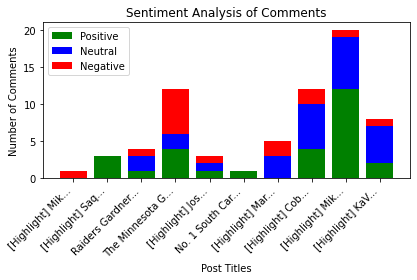

In [5]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def analyze_sentiments(data):
    for post in data:
        post['sentiments'] = {'positive': 0, 'neutral': 0, 'negative': 0}
        for comment in post['comments']:
            score = sia.polarity_scores(comment['comment'])
            if score['compound'] > 0.05:
                sentiment = 'positive'
            elif score['compound'] < -0.05:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            post['sentiments'][sentiment] += 1
    return data

def visualize_sentiments(data):
    post_titles = [post['title'][:15] + '...' for post in data]  # Shorten titles for display
    positive_counts = [post['sentiments']['positive'] for post in data]
    neutral_counts = [post['sentiments']['neutral'] for post in data]
    negative_counts = [post['sentiments']['negative'] for post in data]

    # Plotting
    x = range(len(data))
    plt.bar(x, positive_counts, color='green', label='Positive')
    plt.bar(x, neutral_counts, bottom=positive_counts, color='blue', label='Neutral')
    plt.bar(x, negative_counts, bottom=[i + j for i, j in zip(positive_counts, neutral_counts)], color='red', label='Negative')
    plt.xticks(x, post_titles, rotation=45, ha='right')
    plt.xlabel('Post Titles')
    plt.ylabel('Number of Comments')
    plt.title('Sentiment Analysis of Comments')
    plt.legend()
    plt.tight_layout()
    plt.show()

#sentiment analysis and visualization
processed_data = analyze_sentiments(processed_data)
visualize_sentiments(processed_data)


^ Hence, the above bar graph suggests the volume of Positive, Negative & Neutral comments from your specified subreddit.
